
#                                   GROUP 2 ISM 3
##                 IS 352 EMERGING INFORMATION TECHNOLOGIES AND INNOVATION
  ###                                    ASSIGNMENT TWO ,GROUP NO 2
                                   N/S         NAMES            REG.NUMBER
                                    1     SOPHIA MBARUKO        25114/T.2020
                                    2     EMMANUEL .S. MMANDA   25057/T.2020
                                    3     JEMA .Y. KASANGA      25082/T.2020
                                    4     MWESIGA AUDAX         25101/T.2020
                                    5     CLAUD SANGA           25050/T.2020
                                    6     MUSA ALOYCE           25100/T.2020

#                  TASK  2

In [15]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Loading the dataset
#Loading the datasets
data_04 = pd.read_csv("04-advertising_dataset.csv")

#View the data
display(data_04)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:>

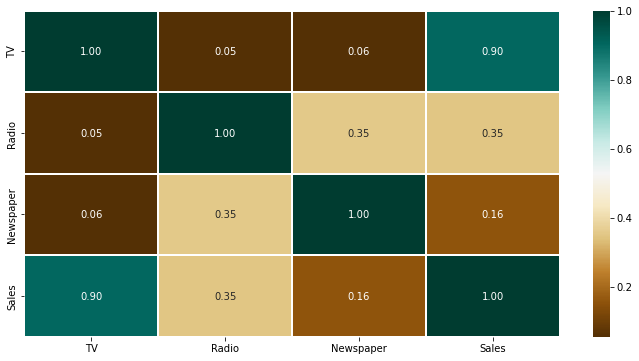

In [16]:
#Exploratory Data Analysis
#This its deep analysis to discover different pattern and sport anomalies
#We use a heatmap using seaborn library
plt.figure(figsize = (12, 6))
sns.heatmap(data_04.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

In [17]:
#Data description
data_04.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
#Spliting the dataset for simple linear regression
X = data_04.iloc[:, : 1]
y = data_04.iloc[:, 3]
#Spliting the dataset as train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25,random_state = 42)
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [19]:
#Building a model for simple linear regression
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(X_train, y_train)

LinearRegression()

In [20]:
#View the calculated parameter/Derived parameter
print("b = {}".format(ls.intercept_))
print("w = {}".format(ls.coef_))

b = 7.098853680118275
w = [0.05538653]


In [21]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("Training accuracy score: {}".format(ls.score(X_train, y_train)))
print("Testing accuracy score: {}".format(ls.score(X_test, y_test)))
y_pred = ls.predict(X_test)
mean_for_simple = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
score_for_simple = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Training accuracy score: 0.811194552365148
Testing accuracy score: 0.7971876919875108
Mean squared error: 5.51
Coefficient of determination: 0.80


In [22]:
#Spliting the data for multiple linear regression
#Sliting the dataset
X = data_04.iloc[:, :-1]
y = data_04.iloc[:, 3]
#Spliting the dataset as train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25,random_state = 42)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
#Building a model for multiple linear regression
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [24]:
#View the calculated parameter/Derived parameter
print("b = {}".format(ln.intercept_))
print("w = {}".format(ln.coef_))

b = 4.741842244124566
w = [0.05461383 0.09975946 0.00430495]


In [25]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("Training accuracy score: {}".format(ln.score(X_train, y_train)))
print("Testing accuracy score: {}".format(ln.score(X_test, y_test)))
y_pred = ln.predict(X_test)
mean_for_multiple = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
score_for_multiple = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Training accuracy score: 0.895775985137604
Testing accuracy score: 0.9115647723992758
Mean squared error: 2.40
Coefficient of determination: 0.91


In [26]:
#By comparison between simple linear regression and multiple linear regression
y_pred_s = ls.predict((data_04.iloc[:, : 1]))
y_pred_m = ln.predict(X_test)
print("Mean squared error for simple linear regression is: {}\nMean squared error for multiple linear regression is: {}".format(mean_for_simple, mean_for_multiple))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for simple linear regression is: {}\nCoefficient of determination for multiple linear regression is: {}".format(score_for_simple,score_for_multiple))


Mean squared error for simple linear regression is: 5.513351187165511
Mean squared error for multiple linear regression is: 2.4040674447118873
Coefficient of determination for simple linear regression is: 0.7971876919875108
Coefficient of determination for multiple linear regression is: 0.9115647723992758


# TASK 3

In [27]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Loading the dataset
#Loading the datasets
data_05 = pd.read_csv("05-insurance_charges.csv")

#View the data
display(data_05)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
#Data description
data_05.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Shape of the dataset is: (1338, 7)


<AxesSubplot:>

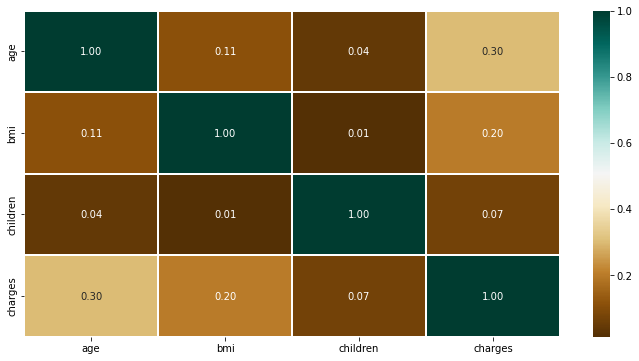

In [29]:
#Data Exploration
print("Shape of the dataset is: {}".format(data_05.shape))
#Feature correlation
#We use a heatmap using seaborn library
plt.figure(figsize = (12, 6))
sns.heatmap(data_05.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

In [30]:
#Implementation of One-Hot-Encoding method
data_dummies = pd.get_dummies(data_05)
display(data_dummies)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [31]:
print("New shape of the dataset is: {}".format(data_dummies.shape))

New shape of the dataset is: (1338, 12)


In [32]:
#Spliting the dataset
X = features = data_dummies.drop("charges", axis = 1)
y = data_dummies.iloc[:, 3]
print("X/features are:")
display(features)
print("y values are:\n{}".format(y))


X/features are:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


y values are:
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
#Spliting the train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Building a linear regression model for multiple features
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [34]:
#Evaluating the models
print("Train accuracy score: {}".format(linear.score(X_train, y_train)))
print("Test accuracy score: {}".format(linear.score(X_test, y_test)))

Train accuracy score: 0.7449555328228536
Test accuracy score: 0.7672642952734358


In [35]:
#Try to use other metrics for evaluating a model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = linear.predict(X_test)
print("Mean squred error: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test,y_pred)))
mean_squared_before = mean_squared_error(y_test, y_pred)
r2_score_before = r2_score(y_test, y_pred)

Mean squred error: 35117755.73613631
R2 score: 0.7672642952734358


In [36]:
#Model improvement
#Let us improve our model now
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Let us fit the scaler
scaler.fit(X_train)
#Then Transform the X_train set
X_train_scaled = scaler.transform(X_train)
print("Transformed shape: {}".format(X_train_scaled.shape))
print("Shape before transformation: {}".format(X_train.shape))

Transformed shape: (1003, 11)
Shape before transformation: (1003, 11)


In [38]:
#Then we transform the X_test set
X_test_scaled = scaler.transform(X_test)#Then we build a model using a scaled data
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
#now let's evaluate a model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = linear.predict(X_test_scaled)
print("A new R2 score is: {}".format(r2_score(y_test, y_pred)))
print("A new mean squared error is: {}".format(mean_squared_error(y_test, y_pred)))
mean_squared_after = mean_squared_error(y_test, y_pred)
r2_score_after = r2_score(y_test, y_pred)

A new R2 score is: 0.7670717297595273
A new mean squared error is: 35146812.16599775


In [39]:
#Comparison of the values before and after scaling the data
print("Mean Squared error before scaling is: {}\nMean Squared error after scaling is: {}".format(mean_squared_before, mean_squared_after))
print("R2 score before scaling is: {}\nR2 score after scaling is: {}".format(r2_score_before, r2_score_after))

Mean Squared error before scaling is: 35117755.73613631
Mean Squared error after scaling is: 35146812.16599775
R2 score before scaling is: 0.7672642952734358
R2 score after scaling is: 0.7670717297595273
